# Part I - Exploration Data Analysis of Loan Data from Prosper
## by Felix Ehoneah Naami

## Introduction
>The Prosper loan data set, made available by Udacity as a requirement for the final project of their Nanodegree program, comprises 113,937 loans, each containing 81 variables. These variables include information such as loan amount, borrower rate (interest rate), current loan status, borrower income, and numerous others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in the prosperLoanData into the dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Assessing Data

In [3]:
# Descriptive statistics for numeric variables
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [4]:
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [5]:
# Displaying an overview of the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


#### Quality issues

1. Some columns are not relevant for this analysis
2. Some values in ProsperScore and DebtToIncomeRatio are null
3. ListingCreationDate data type is object instead of datetime and ProsperScore data type is float instead of integer
4. ProsperScore has values greater than 10
5. Occupation has different description for students

### Cleaning Data

#### Define: 
1. Remove all the irrelevant columns from the dataframe
2. Remove null values from ProsperScore and DebtToIncomeRatio columns
3. Change ListingCreationDate data type to datetime
4. Change ProsperScore data type to integer
5. Replace all the 1,412 values in ProsperScore equal to 11 with 10
6. Reclassify all student related entries in occupation as Student

In [7]:
# Making a copy of the original data
df2 = df.copy()

#### Code

In [8]:
# Creating a subdataset for the analysis using the relevant columns
cols = ['ProsperScore','PercentFunded', 'ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','TotalProsperLoans','LoanNumber','Recommendations','Occupation','Term','EmploymentStatus','DebtToIncomeRatio','MonthlyLoanPayment','EmploymentStatusDuration','IsBorrowerHomeowner','IncomeRange','IncomeVerifiable','LoanKey']
df_clean = df2[cols]

#### Test

In [9]:
# Displaying information about the subdataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ProsperScore               84853 non-null   float64
 1   PercentFunded              113937 non-null  float64
 2   ListingCreationDate        113937 non-null  object 
 3   LoanOriginalAmount         113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   TotalProsperLoans          22085 non-null   float64
 10  LoanNumber                 113937 non-null  int64  
 11  Recommendations            113937 non-null  int64  
 12  Occupation                 110349 non-null  object 
 13  Term                       11

In [10]:
# Displaying data in the subdataset
df_clean.head()

,ProsperScore,PercentFunded,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,TotalProsperLoans,...,Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanKey
0,NaN,1.0,2007-08-26 19:09:29.263000000,9425,Completed,0,0.16516,0.1580,3083.333333,NaN,...,Other,36,Self-employed,0.17,330.43,2.0,True,"$25,000-49,999",True,E33A3400205839220442E84
1,7.0,1.0,2014-02-27 08:28:07.900000000,10000,Current,2,0.12016,0.0920,6125.000000,NaN,...,Professional,36,Employed,0.18,318.93,44.0,False,"$50,000-74,999",True,9E3B37071505919926B1D82
2,NaN,1.0,2007-01-05 15:00:47.090000000,3001,Completed,0,0.28269,0.2750,2083.333333,NaN,...,Other,36,Not available,0.06,123.32,NaN,False,Not displayed,True,6954337960046817851BCB2
3,9.0,1.0,2012-10-22 11:02:35.010000000,10000,Current,16,0.12528,0.0974,2875.000000,NaN,...,Skilled Labor,36,Employed,0.15,321.45,113.0,True,"$25,000-49,999",True,A0393664465886295619C51
4,4.0,1.0,2013-09-14 18:38:39.097000000,15000,Current,2,0.24614,0.2085,9583.333333,1.0,...,Executive,36,Employed,0.26,563.97,44.0,True,"$100,000+",True,A180369302188889200689E


#### Code

In [11]:
# Checking for duplicates
sum(df_clean.duplicated())

0

There no duplicates in the dataset

#### Code

In [12]:
# Defining a function to remove null values
def NotnaValues(value):
    return df_clean[df_clean[value].notnull()]

In [13]:
# Selecting rows only where ProsperScore is not null
value = 'ProsperScore'
df_clean = NotnaValues(value)

In [14]:
# Selecting rows only where DebtToIncomeRatio is not null
value = 'DebtToIncomeRatio'
df_clean = NotnaValues(value)

#### Test

In [15]:
# Checking if the above syntax worked
df_clean.shape

(77557, 22)

All null values removed from dataset

#### Code

In [16]:
# Converting data type to datetime
df_clean.ListingCreationDate = pd.to_datetime(df_clean.ListingCreationDate)

#### Test

In [17]:
# Data type successfully converted
df_clean.ListingCreationDate.info()

<class 'pandas.core.series.Series'>
Int64Index: 77557 entries, 1 to 113936
Series name: ListingCreationDate
Non-Null Count  Dtype         
--------------  -----         
77557 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


#### Code

In [18]:
# Converting data type to integer
df_clean.ProsperScore = df_clean.ProsperScore.astype(int)

#### Test

In [19]:
# Data type successfully converted
df_clean.ProsperScore.info()

<class 'pandas.core.series.Series'>
Int64Index: 77557 entries, 1 to 113936
Series name: ProsperScore
Non-Null Count  Dtype
--------------  -----
77557 non-null  int32
dtypes: int32(1)
memory usage: 908.9 KB


#### Code

In [20]:
# Replacing all the 1412 values equal to 11 with the maximum score of 10
df_clean.loc[df_clean['ProsperScore'] == 11, 'ProsperScore'] = 10

#### Test

In [21]:
# Values successfully replaced
df_clean.ProsperScore.value_counts()

8     11543
6     11309
4     11164
7      9966
5      8776
9      6625
3      6580
10     6051
2      4822
1       721
Name: ProsperScore, dtype: int64

#### Code

In [22]:
#Reclassifying all student related entries as Student
student_list = ['Student - College Senior', 'Student - College Graduate Student', 'Student - Technical School',
             'Student - College Sophomore', 'Student - College Junior', 'Student - Community College', 'Student - College Freshman',
             ]
for lists in student_list:
    df_clean.Occupation.replace(lists, 'Student', inplace=True)


#### Test

In [23]:
#Test if the above syntax worked with assert statements
for phrase in student_list: 
    assert phrase not in df_clean.Occupation.values

In [24]:
# Successfully change to Student
df_clean.Occupation.unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', nan, 'Teacher', 'Clergy', 'Attorney', 'Nurse (RN)',
       'Accountant/CPA', 'Analyst', 'Flight Attendant', 'Nurse (LPN)',
       'Military Officer', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Food Service Management', 'Truck Driver', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Bus Driver', 'Architect',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Religious',
       'Student', 'Principal', '

### What is the structure of your dataset?

> The dataset consists of 113,937 loans, and each loan has 81 variables or features. The majority of the variables are numerical. However, the ProsperScore is an ordered factor variable ranging from 1 to 10. A score of 10 indicates the lowest risk, while a score of 1 indicates the highest risk.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in identifying some of the critical features that have a considerable influence on the borrower rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the loan amount would have the most significant adverse impact on the borrower rate. Additionally, variables such as employment status, occupation, and stated monthly income could have an impact, albeit not as significant as the loan amount.

## Univariate Exploration

> To commence my analysis, I will begin by examining the distribution of the variable of interest one at a time to find patterns in the data..

##### Borrower Rate
The Borrower's interest rate for this loan. 

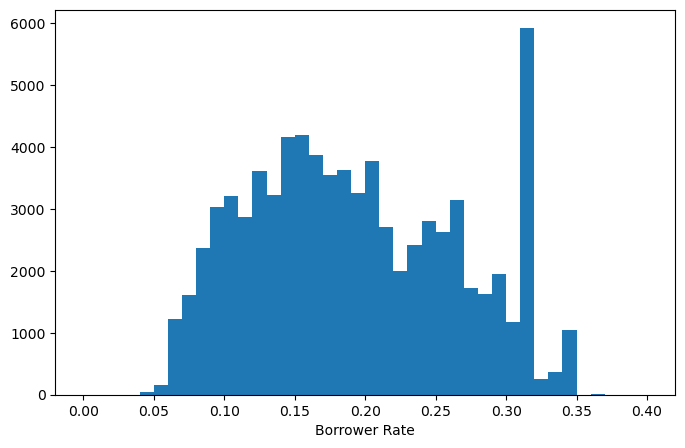

In [25]:
# Plotting the distribution of borrower rate
bins = np.arange(0, df_clean.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');

Upon analyzing the distribution of the borrower rate variable, it appears to have a unimodal shape with a peak centered around 0.15. Notably, there is also a significant steep jump in frequency right after 0.30. These findings indicate that interest rates are generally quite high for the majority of borrowers.

##### Prosper Score
A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

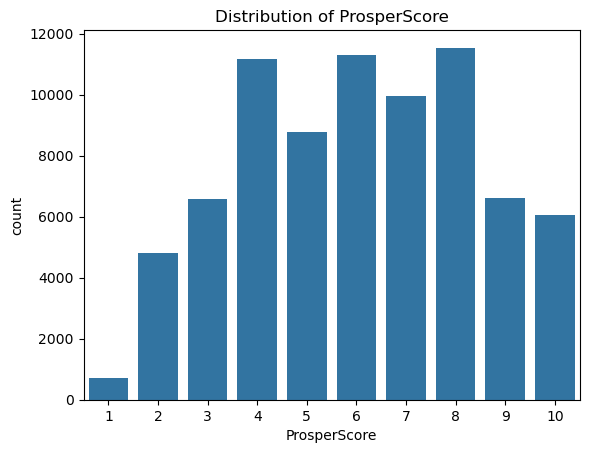

In [26]:
# Plotting the distribution of prosper score
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='ProsperScore', color=base_color).set(title='Distribution of ProsperScore');

After analyzing the distribution of ProsperScore, it appears to be more or less normally distributed. This finding suggests that, on the whole, risk ratings are relatively consistent across the sample.

##### Percent Funded
Percent the listing was funded.

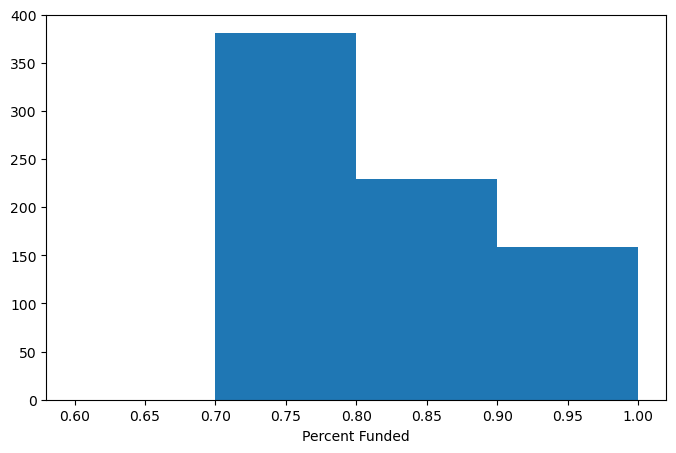

In [27]:
# Plotting the distribution of percent funded
bins = np.arange(0.6, df_clean.PercentFunded.max()+0.05, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'PercentFunded', bins = bins);
plt.xlabel('Percent Funded');

Based on the distribution analysis, it appears that the majority of the listings did not receive full funding.

##### Debt to Income Ratio
The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not
available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

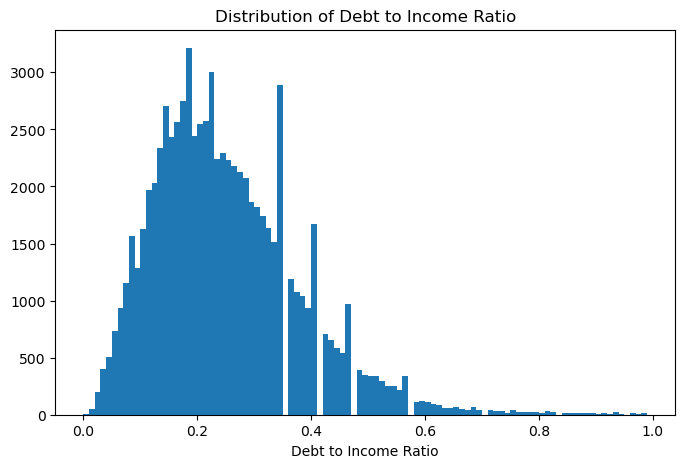

In [28]:
# Plotting the distribution of Debt to income ratio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('Debt to Income Ratio');
plt.title('Distribution of Debt to Income Ratio');

Debt to income ratio has a long-tailed distribution, with a lot of borrowers on a low debt to income ratio end, and few on the high debt to income ratio end. 

##### Stated Monthly Income
The monthly income the borrower stated at the time the listing was created.

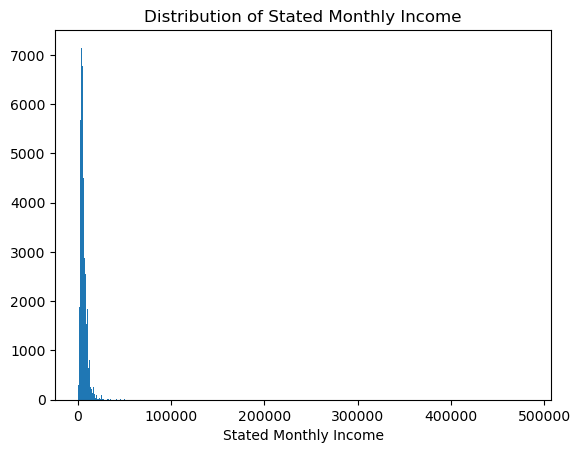

In [29]:
# Distribution of stated monthly income
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated Monthly Income');
plt.title('Distribution of Stated Monthly Income');

Drilling into the bulk of the data to find out the  outliers that drive data to the left

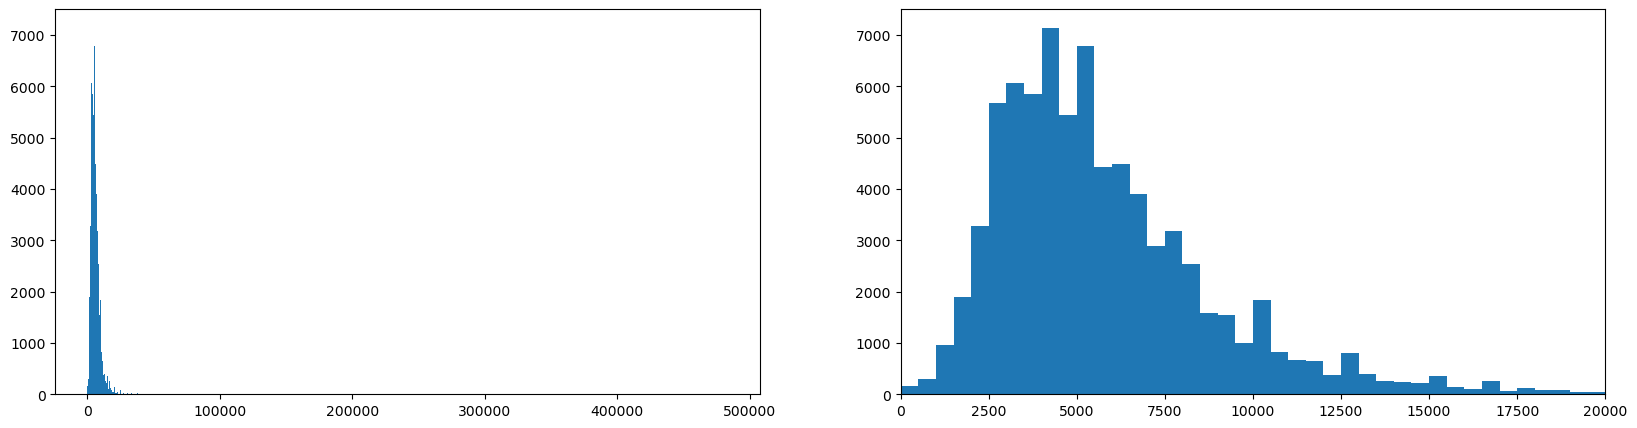

In [30]:
plt.figure(figsize = [20, 5])
# histogram on left: full data
plt.subplot(1, 2, 1)
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);

# histogram on right: focus in on bulk of data < 20000
plt.subplot(1, 2, 2)
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);
plt.xlim(0, 20000); 

According to the distribution, the majority of borrowers' stated monthly income is less than $20,000, and the distribution of the income is skewed to the right.

##### Employment Status, Income range,Income verifiable, home ownership of borrower and Occupation
The employment status of the borrower at the time they posted the listing and the occupation selected by the Borrower at the time they created the listing.

The income range of the borrower at the time the listing was created.

The borrower indicated they have the required documentation to support their income.

A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming
they are a homeowner.

The Occupation selected by the Borrower at the time they created the listing.

In [31]:
# Convert Employment status and Income range into ordered categorical types
empl_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = empl_order)
df_clean['EmploymentStatus'] = df_clean['EmploymentStatus'].astype(ordered_var)

incm_order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','Not employed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = incm_order)
df_clean['IncomeRange'] = df_clean['IncomeRange'].astype(ordered_var)

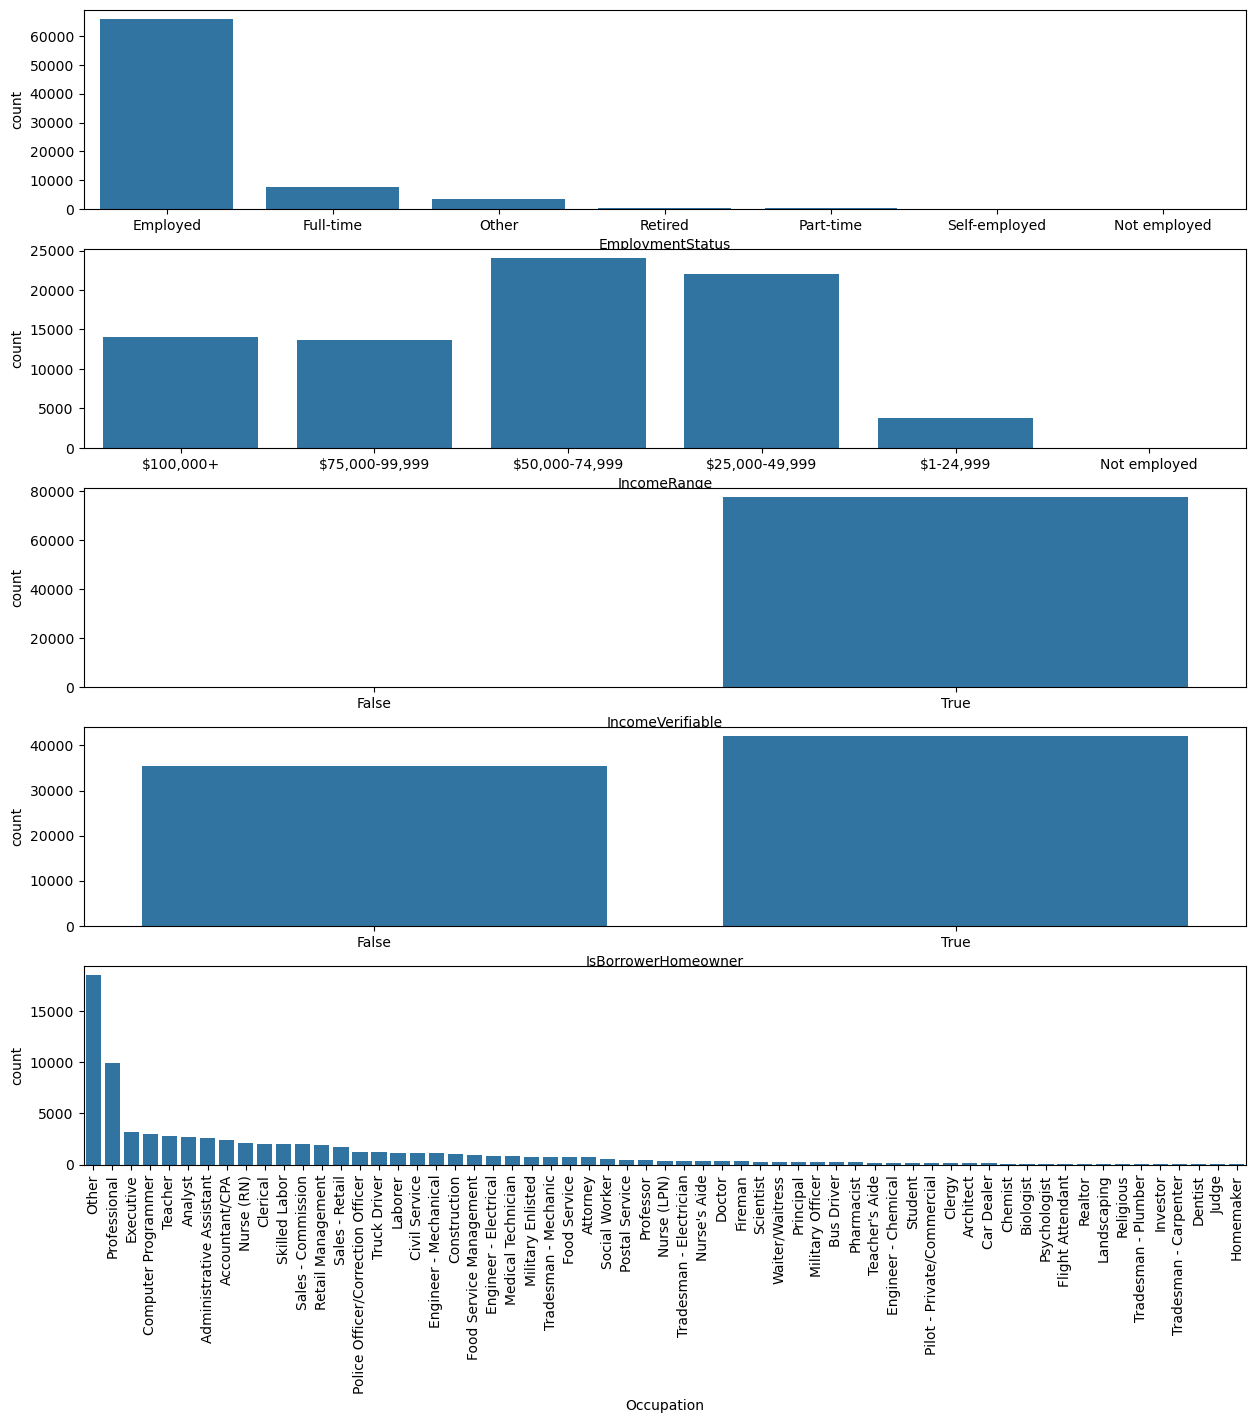

In [32]:
fig, ax = plt.subplots(nrows=5, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'EmploymentStatus', order = df_clean['EmploymentStatus'].value_counts().index, color = default_color, ax = ax[0]);
sb.countplot(data = df_clean, x = 'IncomeRange', color = default_color, ax = ax[1]);
sb.countplot(data = df_clean, x = 'IncomeVerifiable', color = default_color, ax = ax[2]);
sb.countplot(data = df_clean, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[3]);
sb.countplot(data = df_clean, x = 'Occupation', order = df_clean['Occupation'].value_counts().index, color = default_color,  ax = ax[4]);
plt.xticks(rotation=90);

From the distributions above, it is observed that the majority of borrowers are employed, and their occupations mostly fall into the "other" and "professional" categories, which are not very helpful in this case. The income ranges indicate that most borrowers have verifiable incomes less than $50,000 per year. Additionally, a slightly higher number of borrowers are homeowners.

##### Recommendations
Number of recommendations the borrower had at the time the listing was created.

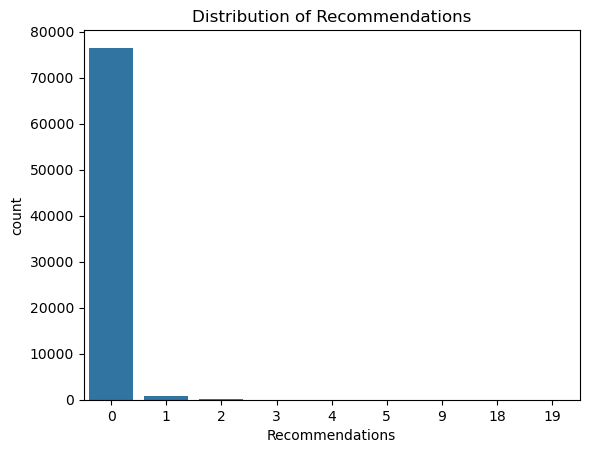

In [33]:
# Plotting the distribution of Reccommendations
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='Recommendations', color=base_color).set(title='Distribution of Recommendations');

At the time of listing creation, only a small number of borrowers had any recommendations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Based on the analysis of the borrower rate variable in the Prosper loan data, it was found to have a unimodal distribution with a peak centered around 0.15. This suggests that a majority of borrowers tend to receive interest rates around this value. Additionally, there was a steep increase in frequency right after 0.30, indicating that a significant portion of borrowers receive interest rates above this value.

>There were no unusual points detected in the distribution of borrower rates, indicating that there were no extreme outliers that would significantly affect the analysis. As such, there was no need to perform any data transformations.

>Overall, the distribution of borrower rates provides valuable insight into the interest rates that borrowers typically receive. By understanding the distribution, borrowers can better prepare themselves for the interest rates they may receive and take steps to improve their creditworthiness if necessary.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Based on the investigation, the distributions of stated monthly income and debt-to-income ratio in the Prosper loan data were found to be right-skewed. This means that there were more borrowers with lower incomes and higher debt-to-income ratios than borrowers with higher incomes and lower debt-to-income ratios.

>However, there was no need to perform any operations on the data to tidy, adjust, or change the form of the data. The right-skewness in the distributions did not significantly affect the analysis or interpretation of the results. Therefore, the data was considered suitable for further analysis without any transformations or adjustments.

>Overall, while some features in the dataset had unusual distributions, these distributions did not require any special treatment for the analysis. By acknowledging and understanding these distributions, analysts can make better judgments on the appropriate statistical methods to use and how to interpret the results.

## Bivariate Exploration

>Next, I would look at the correlations/relationship present between features in the data.

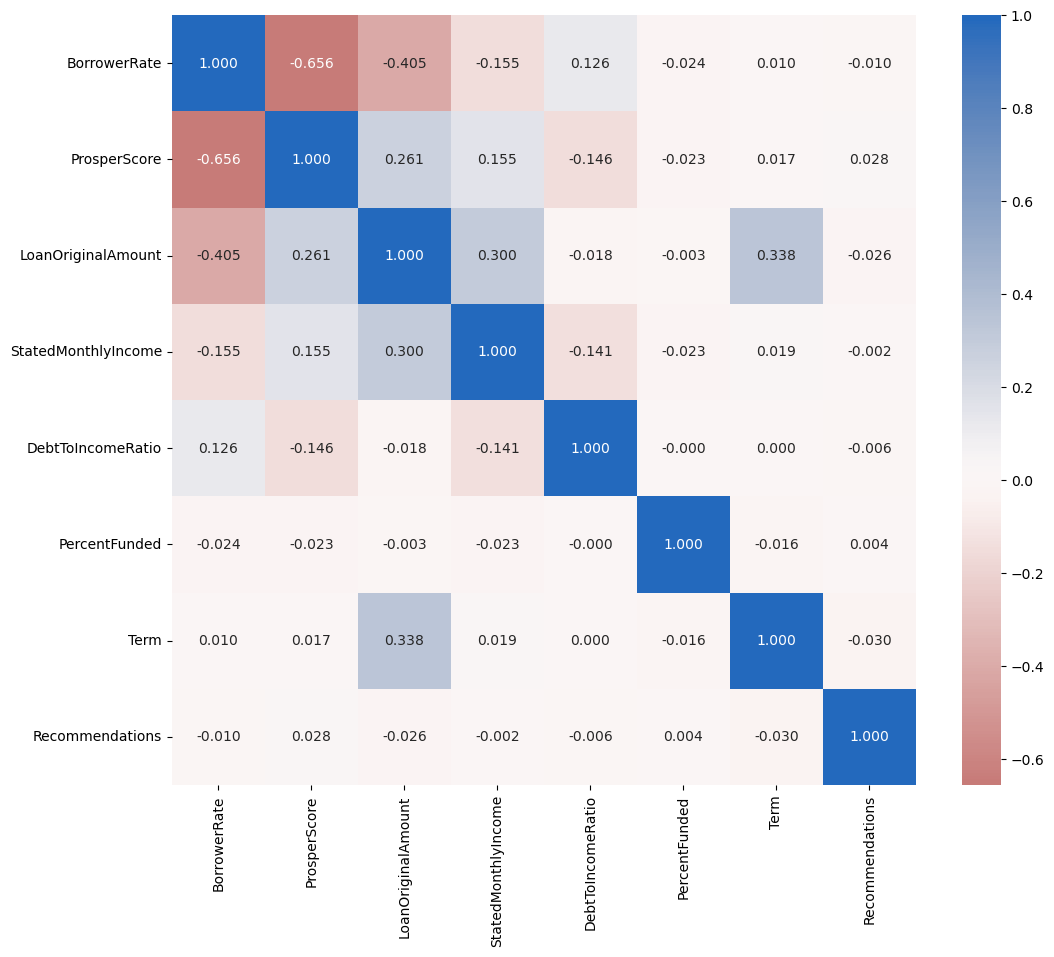

In [34]:
# correlation plot for the numeric variables
numeric_vars = ['BorrowerRate', 'ProsperScore', 'LoanOriginalAmount', 'StatedMonthlyIncome','DebtToIncomeRatio', 'PercentFunded', 'Term', 'Recommendations']
plt.figure(figsize = [12, 10])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

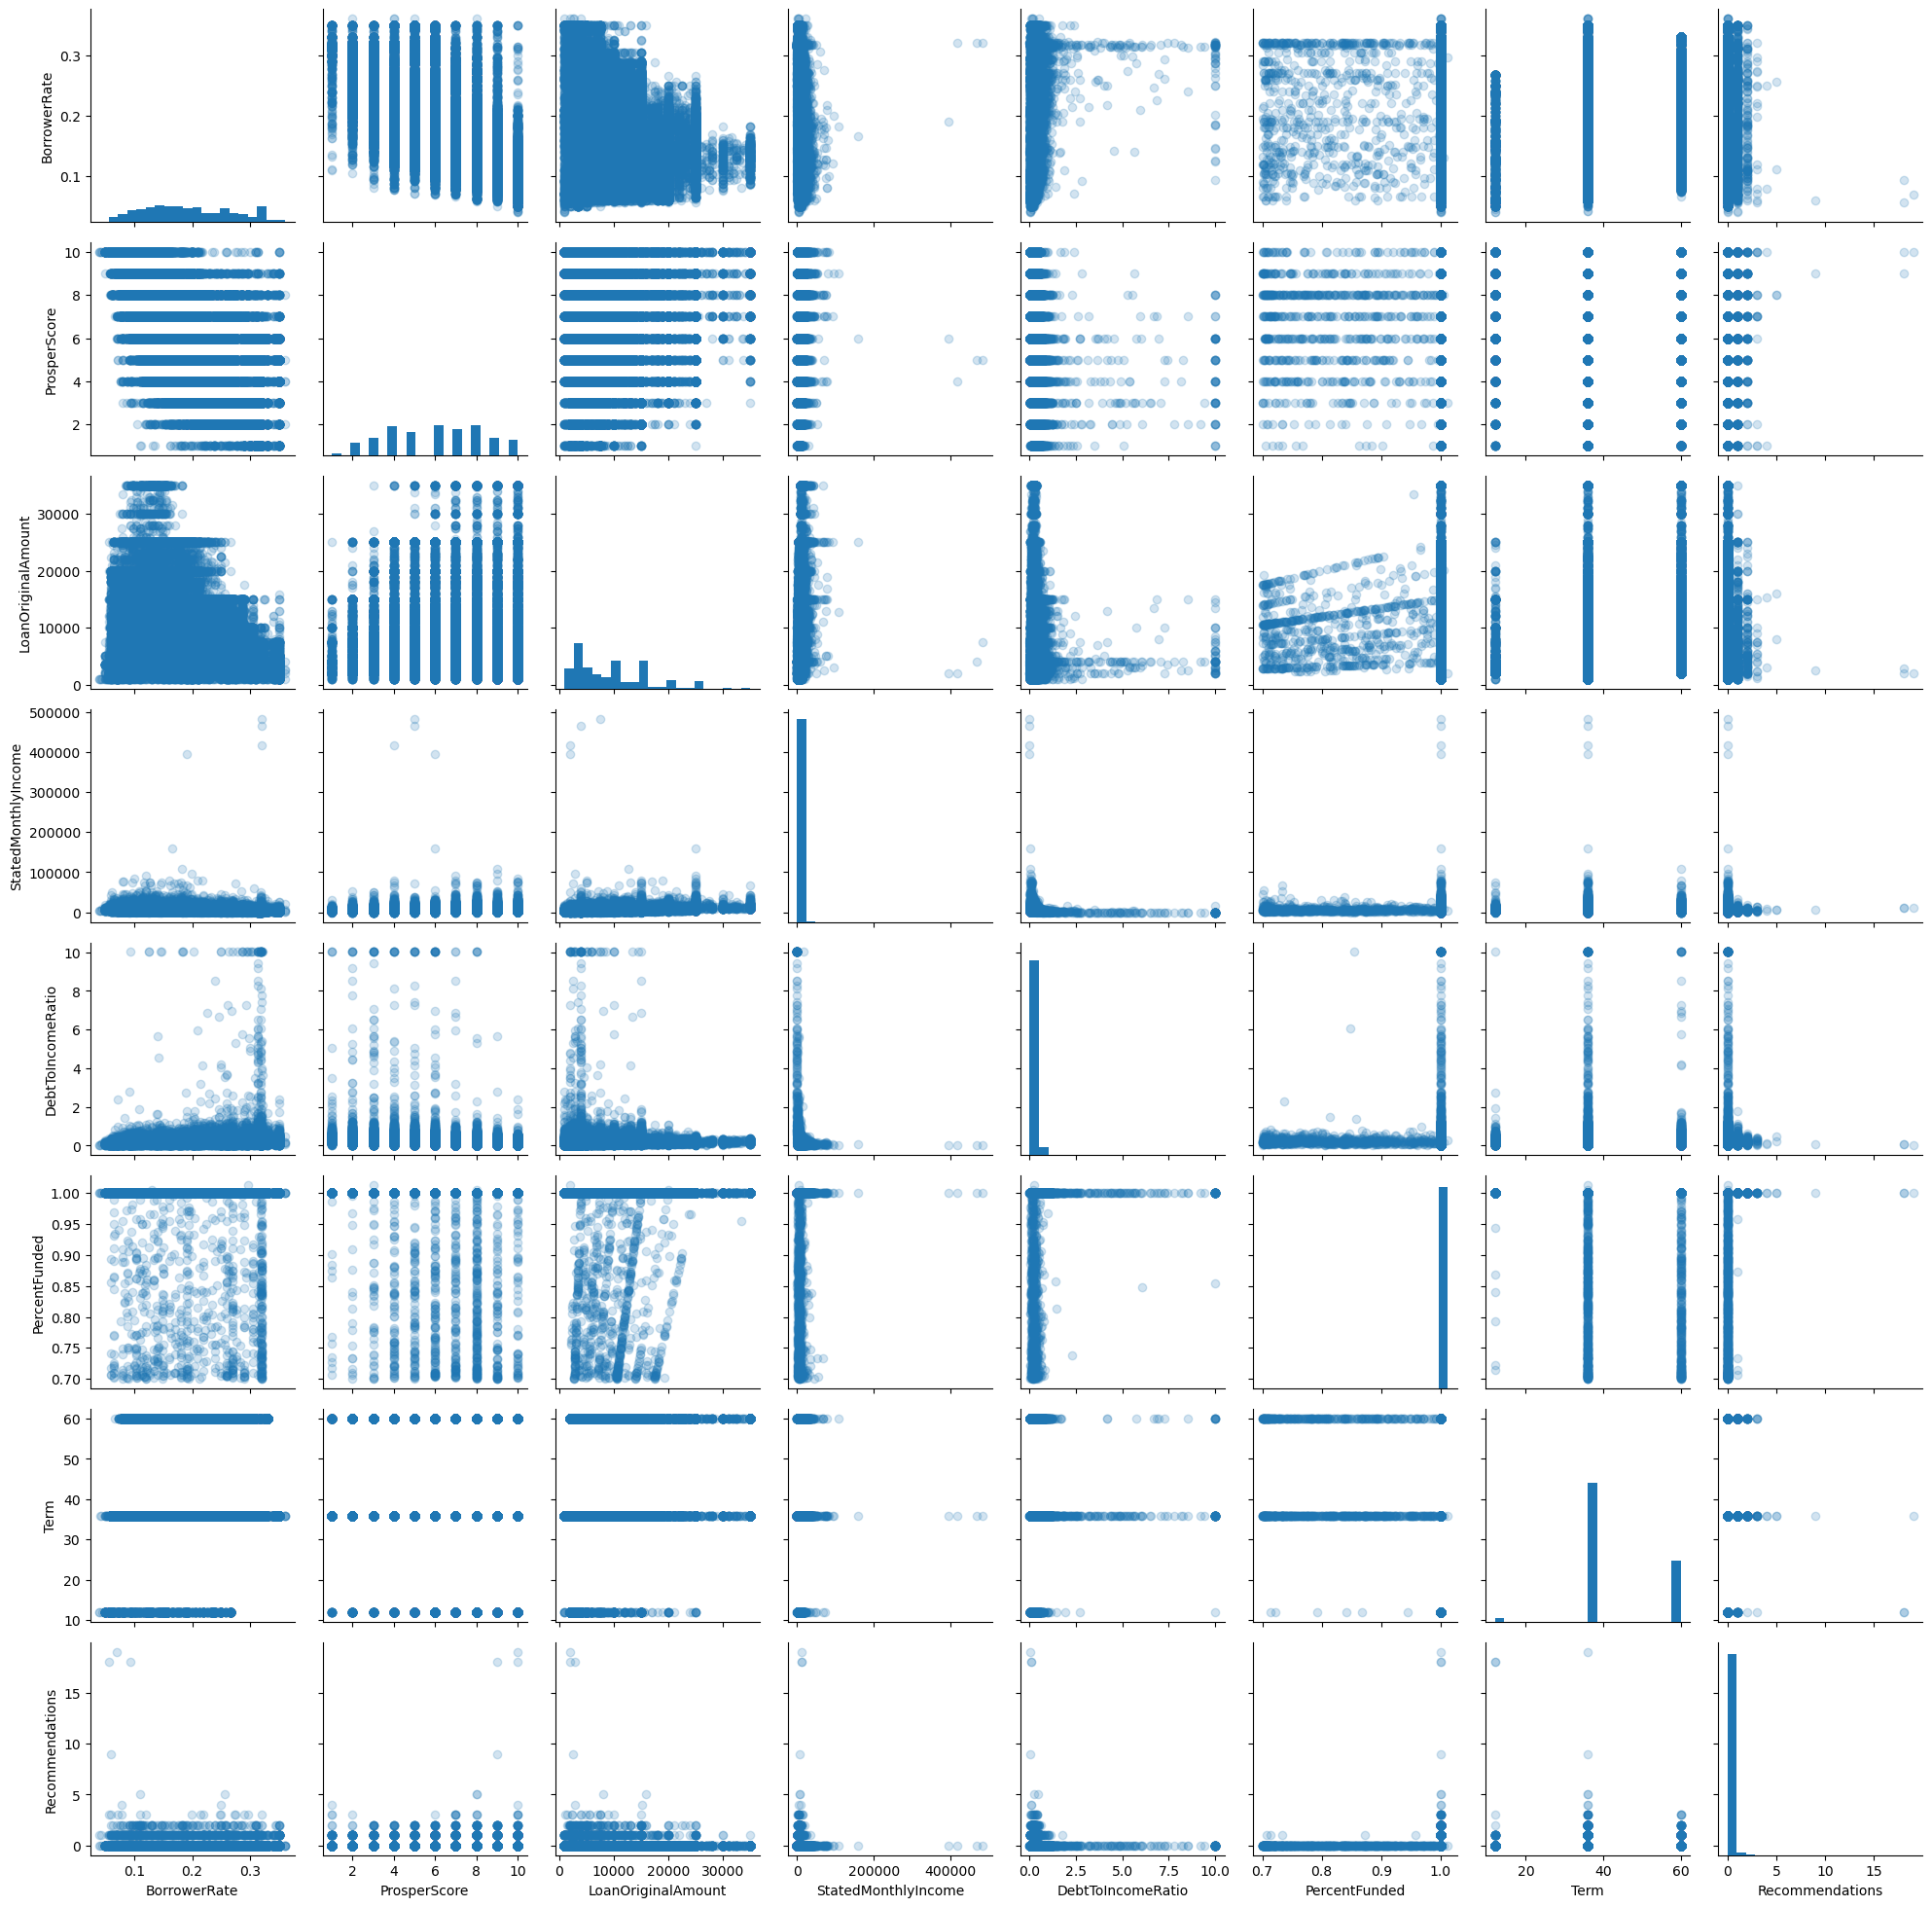

In [35]:
g = sb.PairGrid(data = df_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

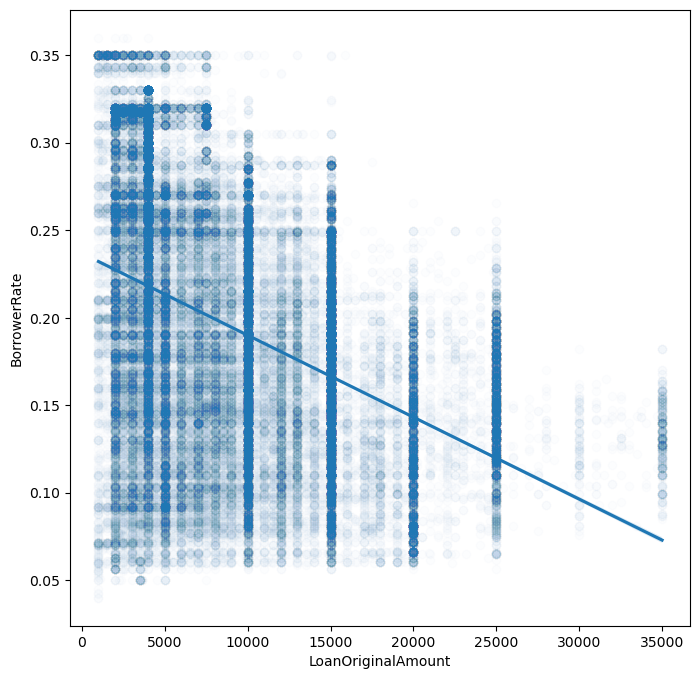

In [36]:
# How borrower rate and loan original amount are related to one another.
plt.figure(figsize = [8, 8])
sb.regplot(data = df_clean, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});

The analysis of the Prosper loan data shows that there is a negative correlation between borrower rate and loan original amount, with a correlation coefficient of -0.405. This relationship is supported by the scatter plot, which illustrates that as loan original amount increases, borrower rate decreases. This finding aligns with the hypothesis established at the beginning of the analysis.

However, it should be noted that there is only a weak negative correlation between borrower rate and stated monthly income.

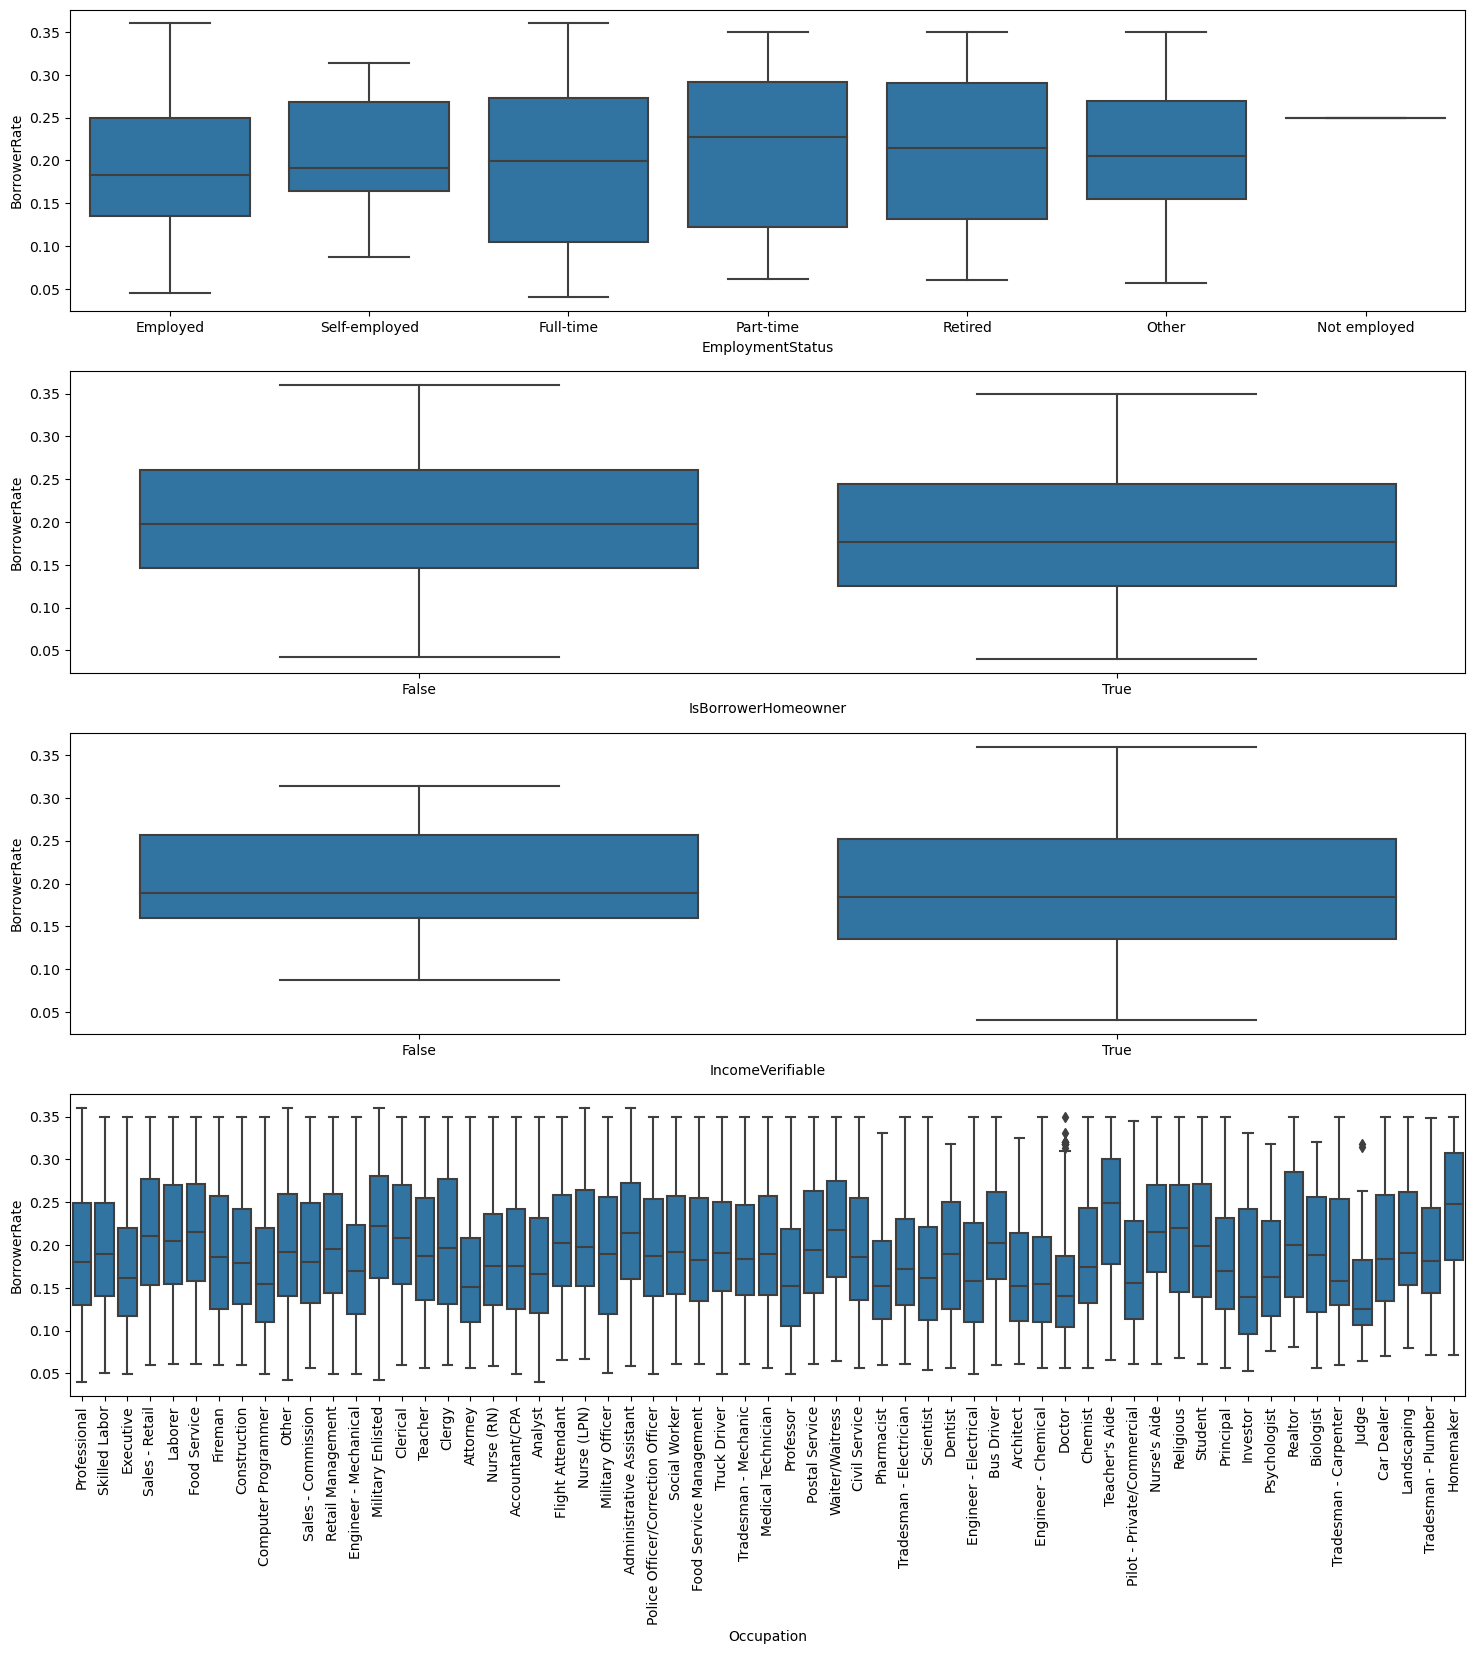

In [37]:
fig, ax = plt.subplots(nrows=4, figsize = [18,18])
default_color = sb.color_palette()[0]
sb.boxplot(data = df_clean, y = 'BorrowerRate', x = 'EmploymentStatus', color = default_color, ax = ax[0]);
sb.boxplot(data = df_clean, y = 'BorrowerRate', x = 'IsBorrowerHomeowner', color = default_color, ax = ax[1]);
sb.boxplot(data = df_clean, y = 'BorrowerRate', x = 'IncomeVerifiable', color = default_color, ax = ax[2]);
sb.boxplot(data = df_clean, y = 'BorrowerRate', x = 'Occupation', color = default_color, ax = ax[3]);
plt.xticks(rotation=90);

In the Prosper loan data, it was observed that borrowers with prestigious occupations such as Doctor, Judge, Attorney, Professor, and Pharmacist received lower rates than other occupations. Additionally, employed borrowers were generally given fairly lower rates than other employment classifications.

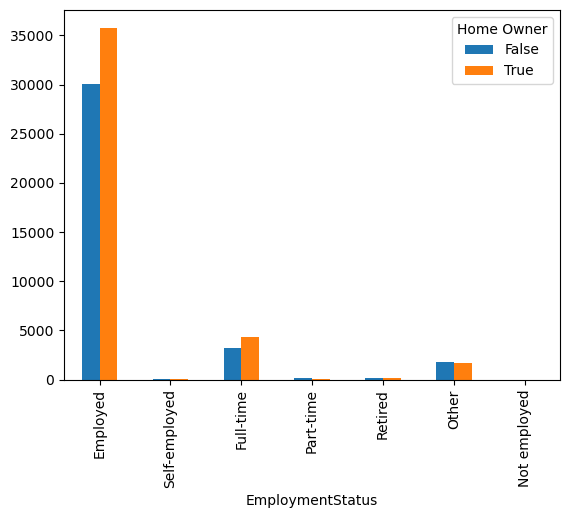

In [38]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df_clean['EmploymentStatus'],columns=df_clean['IsBorrowerHomeowner'])
a = CrosstabResult.plot.bar()
a.legend(title='Home Owner', loc='upper right');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Based on the investigation, some relationships were observed between the borrower rate and other features in the dataset. The borrower rate was found to have a negative association with the loan original amount. This means that as the loan amount increases, the borrower rate tends to decrease. This suggests that borrowers who take out larger loans are more likely to receive lower interest rates.

>Borrowers with prestigious occupations such as Doctor, Judge, Attorney, Professor, and Pharmacist received lower rates than borrowers in other occupations. This suggests that lenders may consider occupation as an important factor when evaluating a borrower's creditworthiness.

>The analysis also found a negative correlation between borrower rate and loan original amount. This indicates that borrowers who take out larger loans tend to receive lower interest rates. However, there is only a weak negative correlation between borrower rate and stated monthly income, borrower rate and home ownership, and borrower rate and verification of income. This suggests that these factors may not be as important to lenders when evaluating a borrower's creditworthiness.

>Furthermore, the data showed that employed borrowers were generally given lower rates than borrowers in other employment classifications. This may suggest that lenders view employment status as an important factor when evaluating a borrower's creditworthiness.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Yes, there were interesting relationships observed between some of the other features in the dataset. For example, there was a positive correlation between the loan amount and the borrowers' stated monthly income. This suggests that borrowers with higher incomes are more likely to qualify for larger loans.

>Additionally, the majority of borrowers in the dataset owned a home, regardless of their employment status. This may explain why there was only a weak correlation between home ownership and borrower rate. In other words, home ownership may not be as significant a factor in determining borrower rates as other features like loan amount and employment status.

>Overall, these relationships provide insight into the factors that lenders consider when evaluating a borrower's creditworthiness. By understanding these relationships, borrowers can better prepare themselves to secure favorable loan terms and rates.


## Multivariate Exploration

>Finally, I will look at the correlations/relationship present among features in the data.


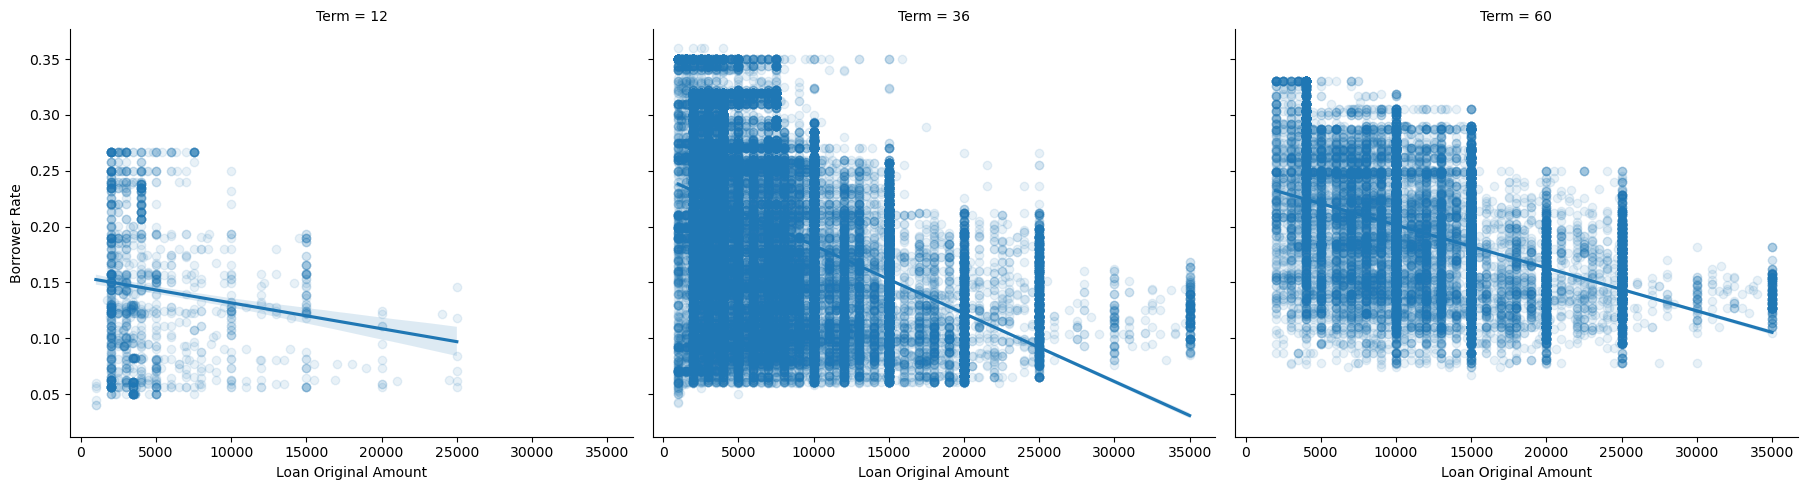

In [39]:
# Analysing the effect of Term on relationship of borrower rate and loan amount
g=sb.FacetGrid(data= df_clean, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_xlabels('Loan Original Amount');
g.set_ylabels('Borrower Rate');

Term does not appear to have an impact on the relationship between borrower rate and loan amount.

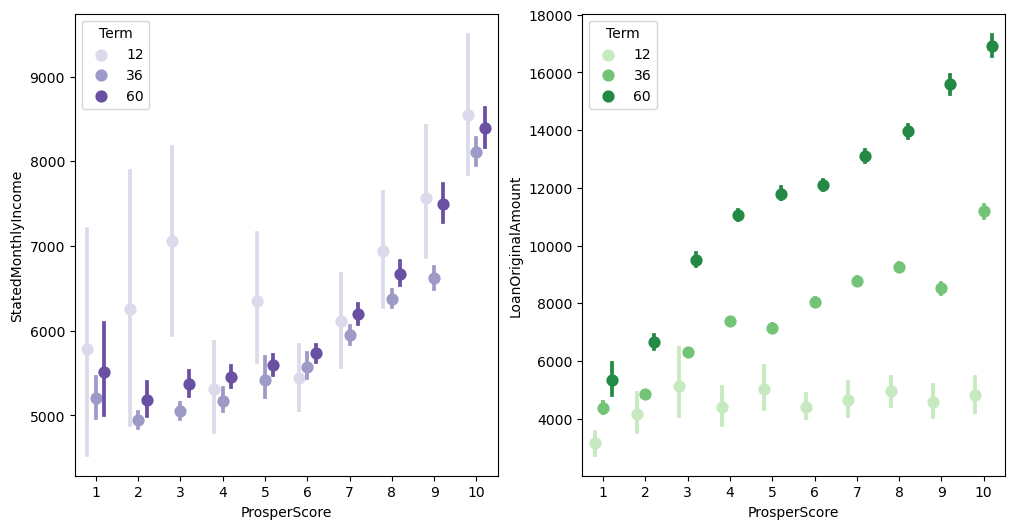

In [40]:
# Analysing the prosper score and term effects on stated monthly income and loan original amount variables
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_clean, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

It appears that there is no interaction effect between term and Prosper score on stated monthly income, as the pattern of term is similar across different Prosper scores. However, there is an interaction effect between term and Prosper score on loan amount. Specifically, as Prosper score improves, the loan amount for all three terms increases, and the difference in loan amount between terms also becomes greater.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>In this part of the investigation, I found that the relationship between borrower rate and loan amount was affected by Prosper score, with the negative correlation turning slightly positive as Prosper score increased. This suggests that borrowers with higher Prosper scores may be able to obtain larger loans with lower rates. Additionally, the relationship between Prosper score and loan amount was found to be positive, with higher scores associated with higher loan amounts. These findings suggest that Prosper score may be a key factor in determining the loan amount and interest rate for borrowers. 

### Were there any interesting or surprising interactions between features?

>Yes, there were a few interesting and surprising interactions between features. One such interaction was observed between the Prosper score and the relationship between borrower rate and loan amount. Specifically, the negative correlation between borrower rate and loan amount was found for Prosper scores 1 to 6, but it turned positive for scores 7 to 10. Another surprising interaction was between Prosper score, borrowing term, and borrower rate. For individuals with scores 1-5, borrower rate decreased as the borrowing term increased, whereas for those with scores 9-10, borrower rate increased with the term. These interactions highlight the importance of considering multiple variables when analyzing relationships between features.

In [41]:
# Saving the cleaned dataset for explanatory data analysis
df_clean.to_csv('ProsperLoanData_cleaned.csv')

## Conclusions
>In conclusion, the Prosper loan data analysis involved exploring and understanding the distribution of various features in the dataset, including borrower rate, stated monthly income, debt-to-income ratio, loan amount, employment status, home ownership, verification of income, and occupation. The analysis utilized univariate, bivariate, and multivariate techniques to uncover relationships between these features and borrower rate.

>The findings revealed that borrower rate has a unimodal distribution with a peak centered around 0.15, and a significant portion of borrowers receive interest rates above 0.30. The distribution of borrower rates provides valuable insight into the interest rates that borrowers typically receive, and by understanding the distribution, borrowers can better prepare themselves for the interest rates they may receive.

>The analysis also revealed relationships between borrower rate and other features in the dataset, including loan amount, occupation, employment status, and stated monthly income. There was a negative correlation between borrower rate and loan amount, indicating that borrowers who take out larger loans tend to receive lower interest rates. Borrowers with prestigious occupations tended to receive lower rates than borrowers in other occupations, and employed borrowers were generally given lower rates than borrowers in other employment classifications.

>The multivariate investigation revealed that the negative relationship between borrower rate and loan amount became slightly positive when Prosper score increased, and borrowers with higher Prosper scores tended to receive higher loan amounts. Additionally, there were unexpected findings related to the impact of Prosper score and term on loan amount and borrower rate.

>Overall, the analysis involved a comprehensive exploration of the Prosper loan data and utilized various techniques to uncover insights and relationships between features. The findings provide valuable information for borrowers and lenders alike and highlight the importance of understanding the factors that affect borrower rates.